In [8]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [10]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(total_words)

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-11-26 19:55:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.240, 172.217.5.240, 172.217.7.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-11-26 19:55:29 (127 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]

3211


In [20]:
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_len -1))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(total_words/2, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation="softmax"))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 10, 256)           234496    
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 256)           0         
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 128)               164352    
_________________________________________________________________
dense_12 (Dense)             (None, 1605)              207045    
_________________________________________________________________
dense_13 (Dense)             (None, 3211)              5156866   
Total params: 6,083,859
Trainable params: 6,083,859
Non-trainable params: 0
____________________________________________

In [21]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 6s 13ms/step - loss: 6.9293 - accuracy: 0.0217
Epoch 2/100
484/484 [==============================] - 6s 13ms/step - loss: 6.5020 - accuracy: 0.0217
Epoch 3/100
484/484 [==============================] - 6s 13ms/step - loss: 6.4051 - accuracy: 0.0272
Epoch 4/100
484/484 [==============================] - 6s 13ms/step - loss: 6.2851 - accuracy: 0.0290
Epoch 5/100
484/484 [==============================] - 6s 13ms/step - loss: 6.1792 - accuracy: 0.0367
Epoch 6/100
484/484 [==============================] - 6s 13ms/step - loss: 6.0954 - accuracy: 0.0388
Epoch 7/100
484/484 [==============================] - 6s 13ms/step - loss: 6.0143 - accuracy: 0.0418
Epoch 8/100
484/484 [==============================] - 6s 13ms/step - loss: 5.9338 - accuracy: 0.0437
Epoch 9/100
484/484 [==============================] - 6s 13ms/step - loss: 5.8389 - accuracy: 0.0477
Epoch 10/100
484/484 [==============================] - 6s 13ms/step - loss: 5.731

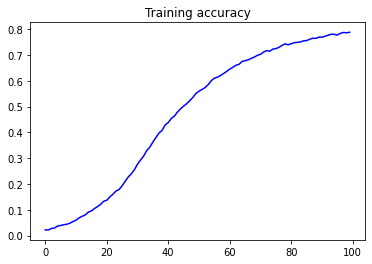

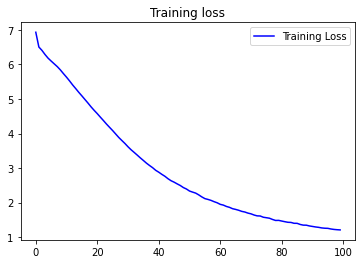

In [22]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [23]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope to give another way ' green thee thee so weep ' find true friend not was too ' grow true place long good ' brought ' place long true heart new parts that true ' bright still had live well might hell made so 'will' or surmount out on store in lease with state with worth or crave ill woe shows you give bright youth in thee bright rolling hence kill'd kill'd kill'd dead friend hid still dead rare bright seen outworn bright bright leaves sad sky gems staineth brow feast be place long away bright prove ill ill state
